In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
# df = pd.read_csv('billboard_200_cleaned.csv')

In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              154 non-null    object
 1   Artist            154 non-null    object
 2   Song/Album Title  154 non-null    object
 3   Peak Position     154 non-null    int64 
 4   Weeks on Chart    154 non-null    int64 
 5   year              154 non-null    int64 
 6   generation        154 non-null    int64 
 7   debut_years       154 non-null    object
dtypes: int64(4), object(4)
memory usage: 9.8+ KB


In [ ]:
# df['date'] = pd.to_datetime(df['date'])

In [ ]:
# bts = df[df['Artist'] == 'BTS']

In [ ]:
# bts.to_csv('bts.csv', index=False)

In [10]:
bts = pd.read_csv('bts.csv')

## Graph_BTS

### Annotations:
- In 2009, only one K-pop album - BOA - made it onto the Billboard 200 chart. The album peaked at position 127 and remained on the chart for just one week. 
- A decade later, nine albums made it onto the Billboard 200, including three releases from BTS. Two of these albums - Love Yourself: Tear and Love Yourself: Answer reached the number one spot and stayed on the chart for over 15 weeks.

### !!! TODO: 
1. insert: https://youtube.com/clip/UgkxX9Ulb1Ai5WpAdtRaz6b9lqbfytEHaLwu?si=8b0bvQJwIqKKKPyr
2. make the dots as lines


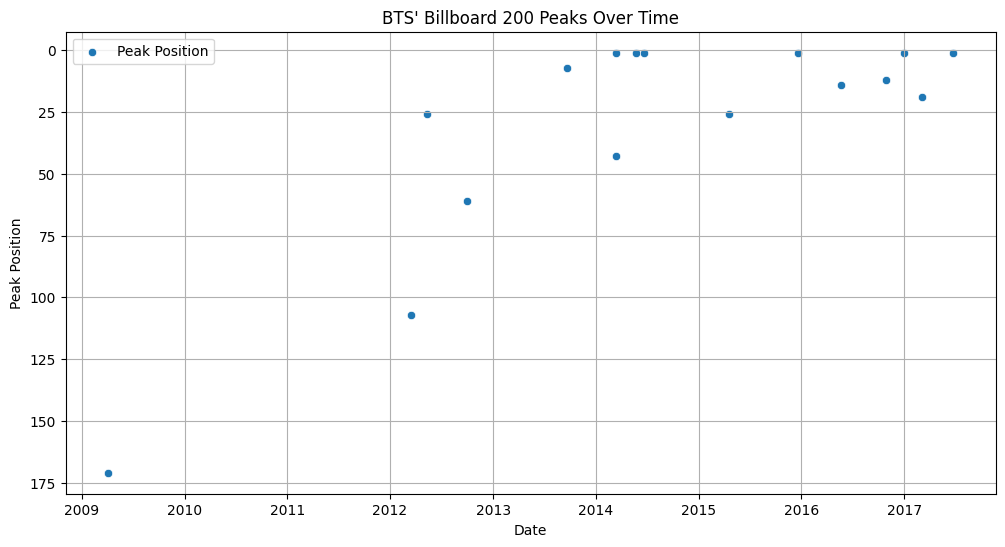

In [11]:
# TODO: Can we combine Weeks and Peak Position in a single plot?

bts['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by date
bts = bts.sort_values(by='date')

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.scatterplot(data=bts, x='date', y='Peak Position', marker='o', label='Peak Position')

plt.title("BTS' Billboard 200 Peaks Over Time")
plt.xlabel('Date')
plt.ylabel('Peak Position')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest peak position at the top
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# Create generation based on artist name 
# df['generation'] = np.where(df['Artist'] == 'BoA', 1, df['generation'])
# df['generation'] = np.where(df['Artist'].isin(['Big Bang', '2NE1', "Girls' Generation-TTS", "Girls' Generation", 'Taeyang', 'G-Dragon', "Jackson Wang", 'Jonghyun']), 2, df['generation'])
# df['generation'] = np.where(df['Artist'].isin(['Exo', 'BTS', "Blackpink", "Exo-K", 'The Rose', 'Seventeen', 'Twice', 'Red Velvet', 'Jimin', 'Jungkook', 'NCT 127', 'NCT Dream', 'NCT', 'J-Hope', 'Loona', 'Nayeon', 'Agust D', 'Jihyo', 'DPR Ian', 'SuperM', 'Monsta X', 'RM', 'V']), 3, df['generation'])
# df['generation'] = np.where(df['Artist'].isin(['Stray Kids', '(G)I-dle', 'TXT', 'Itzy', 'Ateez', 'Aespa', 'NewJeans', 'Enhypen', 'Le Sserafim', 'Nmixx', 'P1Harmony', 'Kep1er' ]), 4, df['generation'])
# df['generation'] = np.where(df['Artist'].isin(['Babymonster', 'Illit', 'BoyNextDoor', 'Xikers']), 5, df['generation'])
  